WEEK3 TASK

From your knowledge on Python for Data analysis and Maths, you’ll be given a Dataset where you’ll be asked to draw inferences from using python and write a report on it.

DESCRIPTION OF PROBLEM

A digital lending company, which prides itself on its effective use of credit risk models to deliver profitable and high-impact loan alternatives. Its assessment approach is based on two main risk drivers of loan default prediction:. 1) willingness to pay and 2) ability to pay. Since not all customers payback, the company invests inexperienced data scientists to build robust models to effectively predict the odds of repayment.

The data scientist is to predict if a loan was good or bad, i.e. accurately predict binary outcome variable, where Good is 1 and Bad is 0.

But at the moment, We are not to build any model. All we would do is to clean and process the data into something an algorithm can take in.

IMPORTING AND MERGING THE DATASETS

For this task, we have been provided with 3 datasets: traindemographics.txt, trainperf.txt and trainprevloan.txt. We would import and view the datasets using pandas library. Then merge the datasets into a single dataset using the pd.merge() method. The merging is done based on intuition of features perceived most important for the modelling

In [209]:
#importing the neccessary libraries for the data analysis

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import scipy as sc
from datetime import datetime

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

In [210]:
df_tdg = pd.read_csv(r"C:\Users\hp\Desktop\SCA mentee\datasets\traindemographics.txt")
df_tdg.info()

df_tdg

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   birthdate                   4346 non-null   object 
 2   bank_account_type           4346 non-null   object 
 3   longitude_gps               4346 non-null   float64
 4   latitude_gps                4346 non-null   float64
 5   bank_name_clients           4346 non-null   object 
 6   bank_branch_clients         51 non-null     object 
 7   employment_status_clients   3698 non-null   object 
 8   level_of_education_clients  587 non-null    object 
dtypes: float64(2), object(7)
memory usage: 305.7+ KB


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10 00:00:00.000000,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21 00:00:00.000000,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01 00:00:00.000000,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19 00:00:00.000000,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22 00:00:00.000000,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN
...,...,...,...,...,...,...,...,...,...
4341,8a858f155554552501555588ca2b3b40,1985-12-13 00:00:00.000000,Other,3.236753,7.030168,Stanbic IBTC,NaN,Permanent,Graduate
4342,8a858fc65cf978f4015cf97cee3a02ce,1982-07-01 00:00:00.000000,Savings,7.013750,4.875662,GT Bank,NaN,NaN,NaN
4343,8a858f4f5b66de3a015b66fc83c61902,1989-09-26 00:00:00.000000,Savings,6.295530,7.092508,GT Bank,NaN,Permanent,NaN
4344,8aaae7a74400b28201441c8b62514150,1985-09-06 00:00:00.000000,Savings,3.354206,6.539070,GT Bank,HEAD OFFICE,Permanent,Primary


In [211]:
df_tpf = pd.read_csv(r"C:\Users\hp\Desktop\SCA mentee\datasets\trainperf.txt")

df_tpf.info()
df_tpf

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4368 entries, 0 to 4367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customerid     4368 non-null   object 
 1   systemloanid   4368 non-null   int64  
 2   loannumber     4368 non-null   int64  
 3   approveddate   4368 non-null   object 
 4   creationdate   4368 non-null   object 
 5   loanamount     4368 non-null   float64
 6   totaldue       4368 non-null   float64
 7   termdays       4368 non-null   int64  
 8   referredby     587 non-null    object 
 9   good_bad_flag  4368 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 341.4+ KB


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good
...,...,...,...,...,...,...,...,...,...,...
4363,8a858e6d58b0cc520158beeb14b22a5a,302003163,2,2017-07-30 09:19:42.000000,2017-07-30 08:18:30.000000,10000.0,13000.0,30,NaN,Bad
4364,8a858ee85cf400f5015cf44ab1c42d5c,301998967,2,2017-07-27 15:35:47.000000,2017-07-27 14:35:40.000000,10000.0,13000.0,30,NaN,Bad
4365,8a858f365b2547f3015b284597147c94,301995576,3,2017-07-25 16:25:57.000000,2017-07-25 15:24:47.000000,10000.0,11500.0,15,NaN,Bad
4366,8a858f935ca09667015ca0ee3bc63f51,301977679,2,2017-07-14 13:50:27.000000,2017-07-14 12:50:21.000000,10000.0,13000.0,30,8a858eda5c8863ff015c9dead65807bb,Bad


In [212]:
df_tpv = pd.read_csv(r"C:\Users\hp\Desktop\SCA mentee\datasets\trainprevloans.txt")

df_tpv.info()
df_tpv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18183 entries, 0 to 18182
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerid       18183 non-null  object 
 1   systemloanid     18183 non-null  int64  
 2   loannumber       18183 non-null  int64  
 3   approveddate     18183 non-null  object 
 4   creationdate     18183 non-null  object 
 5   loanamount       18183 non-null  float64
 6   totaldue         18183 non-null  float64
 7   termdays         18183 non-null  int64  
 8   closeddate       18183 non-null  object 
 9   referredby       1026 non-null   object 
 10  firstduedate     18183 non-null  object 
 11  firstrepaiddate  18183 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 1.7+ MB


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
18178,8a858899538ddb8e0153a2b555421fc5,301611754,2,2016-04-16 13:36:34.000000,2016-04-16 12:36:28.000000,10000.0,13000.0,30,2016-05-14 00:04:52.000000,NaN,2016-05-16 00:00:00.000000,2016-05-13 18:05:07.000000
18179,8a858899538ddb8e0153a2b555421fc5,301761267,9,2016-11-18 14:26:07.000000,2016-11-18 13:25:51.000000,30000.0,34400.0,30,2016-12-13 16:08:57.000000,NaN,2016-12-19 00:00:00.000000,2016-12-13 15:53:48.000000
18180,8a858899538ddb8e0153a2b555421fc5,301631653,4,2016-06-12 15:30:56.000000,2016-06-12 14:30:50.000000,10000.0,13000.0,30,2016-07-09 15:39:00.000000,NaN,2016-07-12 00:00:00.000000,2016-07-09 15:23:56.000000
18181,8a858f0656b7820c0156c92ca3ba436f,301697691,1,2016-08-27 20:03:45.000000,2016-08-27 19:03:34.000000,10000.0,13000.0,30,2016-10-15 10:17:54.000000,NaN,2016-09-26 00:00:00.000000,2016-10-15 10:02:45.000000


In [213]:
#merging the dataset

cols_merge = [df_tpv["firstduedate"], df_tpv["closeddate"], df_tpv["firstrepaiddate"], df_tdg["birthdate"], 
              df_tdg["longitude_gps"], df_tdg["latitude_gps"], df_tdg["bank_account_type"],
              df_tdg["employment_status_clients"], df_tdg["level_of_education_clients"]]

#we create a function to merge important columns of the various datasets
def df_merger(df, cols):
    """Takes a list of columns:cols and merges them with a dataframe:df"""
    
    for col in cols:
        df = pd.merge(df, col, left_index= True, right_index= True)
    return df

df = df_merger(df_tpf, cols_merge)
df


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,firstduedate,closeddate,firstrepaiddate,birthdate,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56.000000,2017-07-25 07:22:47.000000,30000.0,34500.0,30,NaN,Good,2016-09-14 00:00:00.000000,2016-09-01 16:06:48.000000,2016-09-01 15:51:43.000000,1973-10-10 00:00:00.000000,3.319219,6.528604,Savings,NaN,NaN
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41.000000,2017-07-05 16:04:18.000000,15000.0,17250.0,30,NaN,Good,2017-05-30 00:00:00.000000,2017-05-28 14:44:49.000000,2017-05-26 00:00:00.000000,1986-01-21 00:00:00.000000,3.325598,7.119403,Savings,Permanent,NaN
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57.000000,2017-07-06 13:52:51.000000,20000.0,22250.0,15,NaN,Good,2017-04-04 00:00:00.000000,2017-04-26 22:18:56.000000,2017-04-26 22:03:47.000000,1987-04-01 00:00:00.000000,5.746100,5.563174,Savings,NaN,NaN
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41.000000,2017-07-27 18:00:35.000000,10000.0,11500.0,15,NaN,Good,2017-04-24 00:00:00.000000,2017-04-24 01:35:52.000000,2017-04-24 00:48:43.000000,1991-07-19 00:00:00.000000,3.362850,6.642485,Savings,Permanent,NaN
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45.000000,2017-07-03 22:42:39.000000,40000.0,44000.0,30,NaN,Good,2017-07-03 00:00:00.000000,2017-07-14 21:18:43.000000,2017-07-14 21:08:35.000000,1982-11-22 00:00:00.000000,8.455332,11.971410,Savings,Permanent,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,2017-07-28 12:00:25.000000,2017-07-28 11:00:18.000000,20000.0,24500.0,30,NaN,Good,2017-04-04 00:00:00.000000,2017-04-02 20:09:20.000000,2017-04-02 19:54:11.000000,1985-12-13 00:00:00.000000,3.236753,7.030168,Other,Permanent,Graduate
4342,8a858f735aec46c4015af026256357b8,301999973,5,2017-07-28 07:58:26.000000,2017-07-28 06:57:16.000000,20000.0,24500.0,30,NaN,Good,2017-07-10 00:00:00.000000,2017-07-10 15:52:41.000000,2017-07-10 15:42:32.000000,1982-07-01 00:00:00.000000,7.013750,4.875662,Savings,NaN,NaN
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,2017-07-15 13:35:01.000000,2017-07-15 12:34:53.000000,10000.0,11500.0,15,NaN,Good,2017-02-03 00:00:00.000000,2017-02-02 09:11:42.000000,2017-02-02 08:56:32.000000,1989-09-26 00:00:00.000000,6.295530,7.092508,Savings,Permanent,NaN
4344,8a858f8658c206a90158d0c447863597,301988349,8,2017-07-20 21:20:00.000000,2017-07-20 20:19:53.000000,30000.0,34500.0,30,NaN,Good,2017-06-22 00:00:00.000000,2017-07-07 14:57:38.000000,2017-06-28 19:18:40.000000,1985-09-06 00:00:00.000000,3.354206,6.539070,Savings,Permanent,Primary


In [214]:
#lets view the content of our merged dataset

df.drop(["referredby"], axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4345
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  4346 non-null   object 
 1   systemloanid                4346 non-null   int64  
 2   loannumber                  4346 non-null   int64  
 3   approveddate                4346 non-null   object 
 4   creationdate                4346 non-null   object 
 5   loanamount                  4346 non-null   float64
 6   totaldue                    4346 non-null   float64
 7   termdays                    4346 non-null   int64  
 8   good_bad_flag               4346 non-null   object 
 9   firstduedate                4346 non-null   object 
 10  closeddate                  4346 non-null   object 
 11  firstrepaiddate             4346 non-null   object 
 12  birthdate                   4346 non-null   object 
 13  longitude_gps               4346 

EXPLORING AND FORMATING DATA TYPE

Some of the features such as date are presented in the wrong datatype. we would convert to suitable datatypes. We would also explore the statistical properties of our data.

In [215]:
df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,4.346000e+03,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000,4346.000000
mean,3.019810e+08,5.169581,17801.426599,21250.540888,29.271744,4.626189,7.251356
std,1.342529e+04,3.650181,10745.166507,11941.240232,11.533411,7.184832,3.055052
min,3.019585e+08,2.000000,10000.000000,10000.000000,15.000000,-118.247009,-33.868818
25%,3.019692e+08,2.000000,10000.000000,13000.000000,30.000000,3.354953,6.470610
50%,3.019801e+08,4.000000,10000.000000,13000.000000,30.000000,3.593302,6.621888
75%,3.019935e+08,7.000000,20000.000000,24500.000000,30.000000,6.545220,7.425052
max,3.020040e+08,27.000000,60000.000000,68100.000000,90.000000,151.209290,71.228069


In [216]:
df.corr()

#corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any null values are automatically excluded. 
#For any non-numeric data type columns in the dataframe it is ignored

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
systemloanid,1.000000,-0.046273,-0.056726,-0.061123,-0.065080,0.015890,-0.010882
loannumber,-0.046273,1.000000,0.832774,0.814711,0.406060,-0.025353,0.004455
loanamount,-0.056726,0.832774,1.000000,0.994375,0.559951,-0.028604,0.013974
totaldue,-0.061123,0.814711,0.994375,1.000000,0.628739,-0.028877,0.012885
termdays,-0.065080,0.406060,0.559951,0.628739,1.000000,-0.021596,0.018214
longitude_gps,0.015890,-0.025353,-0.028604,-0.028877,-0.021596,1.000000,-0.172954
latitude_gps,-0.010882,0.004455,0.013974,0.012885,0.018214,-0.172954,1.000000


In [217]:
#converting the datatype of date columns to datetime and timestamps(time in seconds)


date_cols = ["birthdate", "approveddate", "creationdate", "closeddate", "firstduedate", "firstrepaiddate"]

#creating a datetime converter function
def convert_type(df, cols):
    
    timfmt = "%Y-%m-%d %H:%M:%S"
    
    for col in cols:
        df[col] = pd.to_datetime(df[col], format = timfmt, errors = 'coerce')
        df[col +"_ts"] = df[[col]].apply(lambda x: x[0].timestamp(), axis=1).astype(float)
        
        
#calling the converter function
convert_type(df, date_cols)


df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4346 entries, 0 to 4345
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  4346 non-null   object        
 1   systemloanid                4346 non-null   int64         
 2   loannumber                  4346 non-null   int64         
 3   approveddate                4346 non-null   datetime64[ns]
 4   creationdate                4346 non-null   datetime64[ns]
 5   loanamount                  4346 non-null   float64       
 6   totaldue                    4346 non-null   float64       
 7   termdays                    4346 non-null   int64         
 8   good_bad_flag               4346 non-null   object        
 9   firstduedate                4346 non-null   datetime64[ns]
 10  closeddate                  4346 non-null   datetime64[ns]
 11  firstrepaiddate             4346 non-null   datetime64[n

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,good_bad_flag,firstduedate,...,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birthdate_ts,approveddate_ts,creationdate_ts,closeddate_ts,firstduedate_ts,firstrepaiddate_ts
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,Good,2016-09-14,...,6.528604,Savings,NaN,NaN,119059200.0,1.500971e+09,1.500967e+09,1.472746e+09,1.473811e+09,1.472745e+09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,Good,2017-05-30,...,7.119403,Savings,Permanent,NaN,506649600.0,1.499274e+09,1.499271e+09,1.495983e+09,1.496102e+09,1.495757e+09
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,Good,2017-04-04,...,5.563174,Savings,NaN,NaN,544233600.0,1.499353e+09,1.499349e+09,1.493245e+09,1.491264e+09,1.493244e+09
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,Good,2017-04-24,...,6.642485,Savings,Permanent,NaN,679881600.0,1.501182e+09,1.501178e+09,1.492998e+09,1.492992e+09,1.492995e+09
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,Good,2017-07-03,...,11.971410,Savings,Permanent,NaN,406771200.0,1.499125e+09,1.499122e+09,1.500067e+09,1.499040e+09,1.500067e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,2017-07-28 12:00:25,2017-07-28 11:00:18,20000.0,24500.0,30,Good,2017-04-04,...,7.030168,Other,Permanent,Graduate,503280000.0,1.501243e+09,1.501240e+09,1.491164e+09,1.491264e+09,1.491163e+09
4342,8a858f735aec46c4015af026256357b8,301999973,5,2017-07-28 07:58:26,2017-07-28 06:57:16,20000.0,24500.0,30,Good,2017-07-10,...,4.875662,Savings,NaN,NaN,394329600.0,1.501229e+09,1.501225e+09,1.499702e+09,1.499645e+09,1.499701e+09
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,2017-07-15 13:35:01,2017-07-15 12:34:53,10000.0,11500.0,15,Good,2017-02-03,...,7.092508,Savings,Permanent,NaN,622771200.0,1.500126e+09,1.500122e+09,1.486027e+09,1.486080e+09,1.486026e+09
4344,8a858f8658c206a90158d0c447863597,301988349,8,2017-07-20 21:20:00,2017-07-20 20:19:53,30000.0,34500.0,30,Good,2017-06-22,...,6.539070,Savings,Permanent,Primary,494812800.0,1.500586e+09,1.500582e+09,1.499439e+09,1.498090e+09,1.498678e+09


In [218]:
#Dropping initial date columns

df.drop(columns = date_cols, axis = 1, inplace = True) 

In [219]:
df

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birthdate_ts,approveddate_ts,creationdate_ts,closeddate_ts,firstduedate_ts,firstrepaiddate_ts
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,3.319219,6.528604,Savings,NaN,NaN,119059200.0,1.500971e+09,1.500967e+09,1.472746e+09,1.473811e+09,1.472745e+09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,17250.0,30,Good,3.325598,7.119403,Savings,Permanent,NaN,506649600.0,1.499274e+09,1.499271e+09,1.495983e+09,1.496102e+09,1.495757e+09
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,22250.0,15,Good,5.746100,5.563174,Savings,NaN,NaN,544233600.0,1.499353e+09,1.499349e+09,1.493245e+09,1.491264e+09,1.493244e+09
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,11500.0,15,Good,3.362850,6.642485,Savings,Permanent,NaN,679881600.0,1.501182e+09,1.501178e+09,1.492998e+09,1.492992e+09,1.492995e+09
4,8a858970548359cc0154883481981866,301962360,9,40000.0,44000.0,30,Good,8.455332,11.971410,Savings,Permanent,NaN,406771200.0,1.499125e+09,1.499122e+09,1.500067e+09,1.499040e+09,1.500067e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,20000.0,24500.0,30,Good,3.236753,7.030168,Other,Permanent,Graduate,503280000.0,1.501243e+09,1.501240e+09,1.491164e+09,1.491264e+09,1.491163e+09
4342,8a858f735aec46c4015af026256357b8,301999973,5,20000.0,24500.0,30,Good,7.013750,4.875662,Savings,NaN,NaN,394329600.0,1.501229e+09,1.501225e+09,1.499702e+09,1.499645e+09,1.499701e+09
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,10000.0,11500.0,15,Good,6.295530,7.092508,Savings,Permanent,NaN,622771200.0,1.500126e+09,1.500122e+09,1.486027e+09,1.486080e+09,1.486026e+09
4344,8a858f8658c206a90158d0c447863597,301988349,8,30000.0,34500.0,30,Good,3.354206,6.539070,Savings,Permanent,Primary,494812800.0,1.500586e+09,1.500582e+09,1.499439e+09,1.498090e+09,1.498678e+09


HANDLING MISSING DATA

In [220]:
#confirming existence of missing values in dataset
df.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
loanamount                       0
totaldue                         0
termdays                         0
good_bad_flag                    0
longitude_gps                    0
latitude_gps                     0
bank_account_type                0
employment_status_clients      648
level_of_education_clients    3759
birthdate_ts                     0
approveddate_ts                  0
creationdate_ts                  0
closeddate_ts                    0
firstduedate_ts                  0
firstrepaiddate_ts               0
dtype: int64

In [221]:
#replacing missing values
df["employment_status_clients"].replace(np.nan, df["employment_status_clients"].mode().values[0], inplace=True)
df["level_of_education_clients"].replace(np.nan, df["level_of_education_clients"].mode().values[0], inplace=True)
df.isnull().sum()


customerid                    0
systemloanid                  0
loannumber                    0
loanamount                    0
totaldue                      0
termdays                      0
good_bad_flag                 0
longitude_gps                 0
latitude_gps                  0
bank_account_type             0
employment_status_clients     0
level_of_education_clients    0
birthdate_ts                  0
approveddate_ts               0
creationdate_ts               0
closeddate_ts                 0
firstduedate_ts               0
firstrepaiddate_ts            0
dtype: int64

In [222]:
df

,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birthdate_ts,approveddate_ts,creationdate_ts,closeddate_ts,firstduedate_ts,firstrepaiddate_ts
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,Good,3.319219,6.528604,Savings,Permanent,Graduate,119059200.0,1.500971e+09,1.500967e+09,1.472746e+09,1.473811e+09,1.472745e+09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,17250.0,30,Good,3.325598,7.119403,Savings,Permanent,Graduate,506649600.0,1.499274e+09,1.499271e+09,1.495983e+09,1.496102e+09,1.495757e+09
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,22250.0,15,Good,5.746100,5.563174,Savings,Permanent,Graduate,544233600.0,1.499353e+09,1.499349e+09,1.493245e+09,1.491264e+09,1.493244e+09
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,11500.0,15,Good,3.362850,6.642485,Savings,Permanent,Graduate,679881600.0,1.501182e+09,1.501178e+09,1.492998e+09,1.492992e+09,1.492995e+09
4,8a858970548359cc0154883481981866,301962360,9,40000.0,44000.0,30,Good,8.455332,11.971410,Savings,Permanent,Graduate,406771200.0,1.499125e+09,1.499122e+09,1.500067e+09,1.499040e+09,1.500067e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,20000.0,24500.0,30,Good,3.236753,7.030168,Other,Permanent,Graduate,503280000.0,1.501243e+09,1.501240e+09,1.491164e+09,1.491264e+09,1.491163e+09
4342,8a858f735aec46c4015af026256357b8,301999973,5,20000.0,24500.0,30,Good,7.013750,4.875662,Savings,Permanent,Graduate,394329600.0,1.501229e+09,1.501225e+09,1.499702e+09,1.499645e+09,1.499701e+09
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,10000.0,11500.0,15,Good,6.295530,7.092508,Savings,Permanent,Graduate,622771200.0,1.500126e+09,1.500122e+09,1.486027e+09,1.486080e+09,1.486026e+09
4344,8a858f8658c206a90158d0c447863597,301988349,8,30000.0,34500.0,30,Good,3.354206,6.539070,Savings,Permanent,Primary,494812800.0,1.500586e+09,1.500582e+09,1.499439e+09,1.498090e+09,1.498678e+09


EXPLORATORY DATA ANALYSIS

In [223]:
#checking the value counts for categorical variables

cat_var = ["bank_account_type", "employment_status_clients", 
         "level_of_education_clients", "good_bad_flag"]

for item in cat_var:
    print(f"the value count for {item} is:\n", df[item].value_counts(), "\n")

the value count for bank_account_type is:
 Savings    3425
Other       865
Current      56
Name: bank_account_type, dtype: int64 

the value count for employment_status_clients is:
 Permanent        3794
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64 

the value count for level_of_education_clients is:
 Graduate         4179
Secondary          89
Post-Graduate      68
Primary            10
Name: level_of_education_clients, dtype: int64 

the value count for good_bad_flag is:
 Good    3403
Bad      943
Name: good_bad_flag, dtype: int64 



In [224]:
#Checking for presence of duplicate data in our dataset
duplicate_df = df.duplicated()
print("sum of duplicates =", duplicate_df.sum(), "\n")
df[duplicate_df]

sum of duplicates = 0 



,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birthdate_ts,approveddate_ts,creationdate_ts,closeddate_ts,firstduedate_ts,firstrepaiddate_ts


BIVARIATE ANALYSIS OF DATA

We can visualize the datasets in pairs to see if there is any form of relationship between them


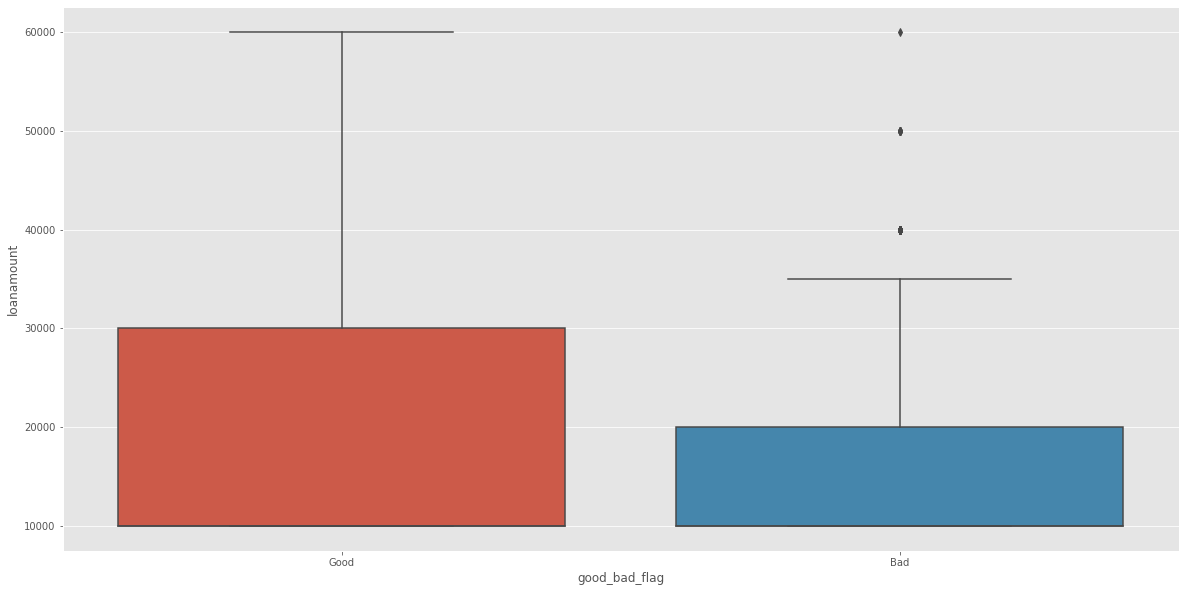

In [225]:
sns.boxplot(y = "loanamount", x = "good_bad_flag", data = df)

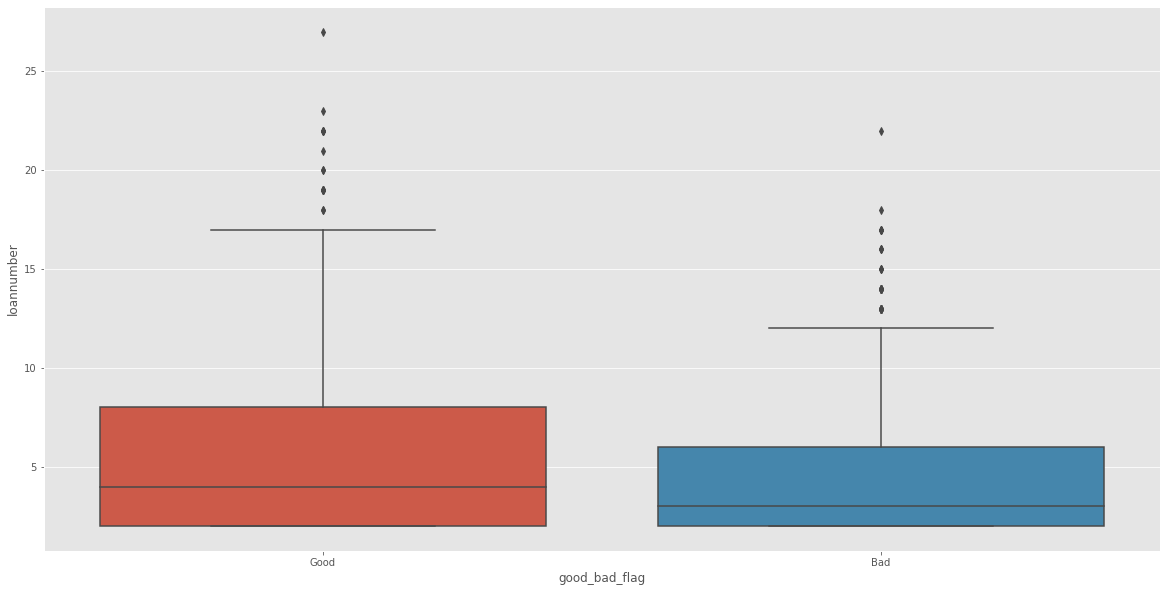

In [226]:
sns.boxplot(y = "loannumber", x = "good_bad_flag", data = df)

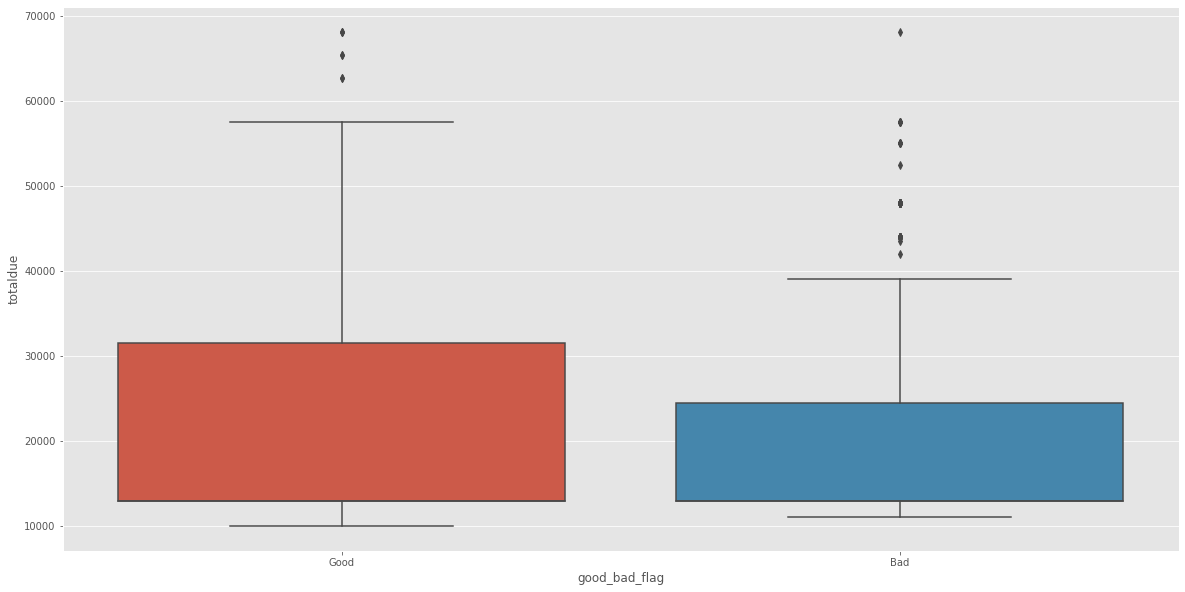

In [227]:
sns.boxplot(y = "totaldue", x = "good_bad_flag", data = df)

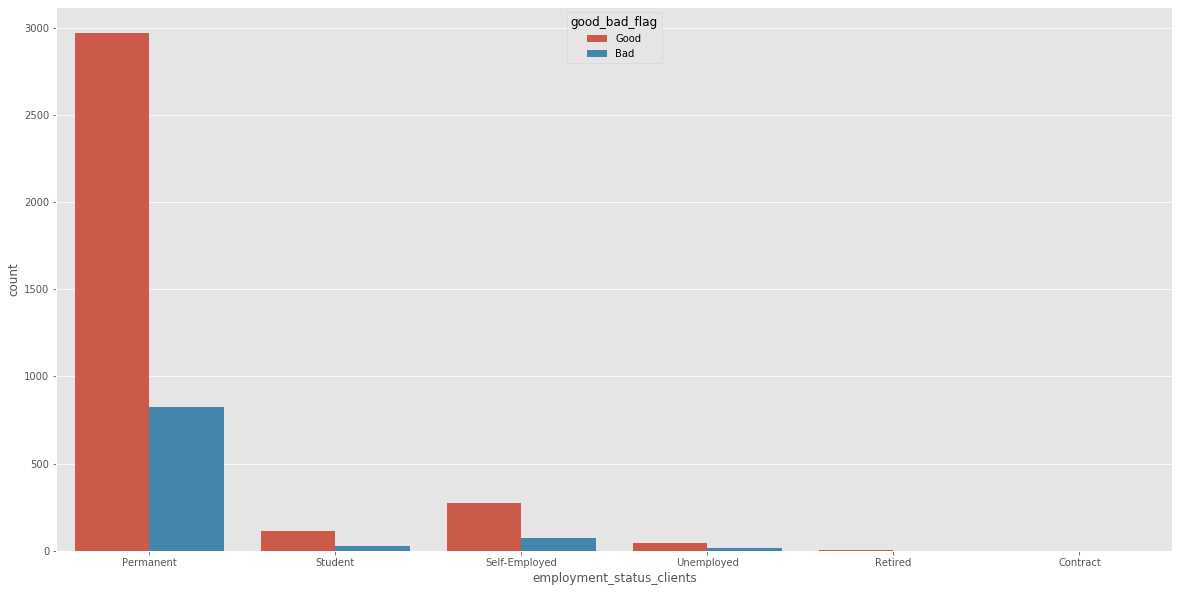

In [228]:
sns.countplot(x = "employment_status_clients", hue = "good_bad_flag", data = df)

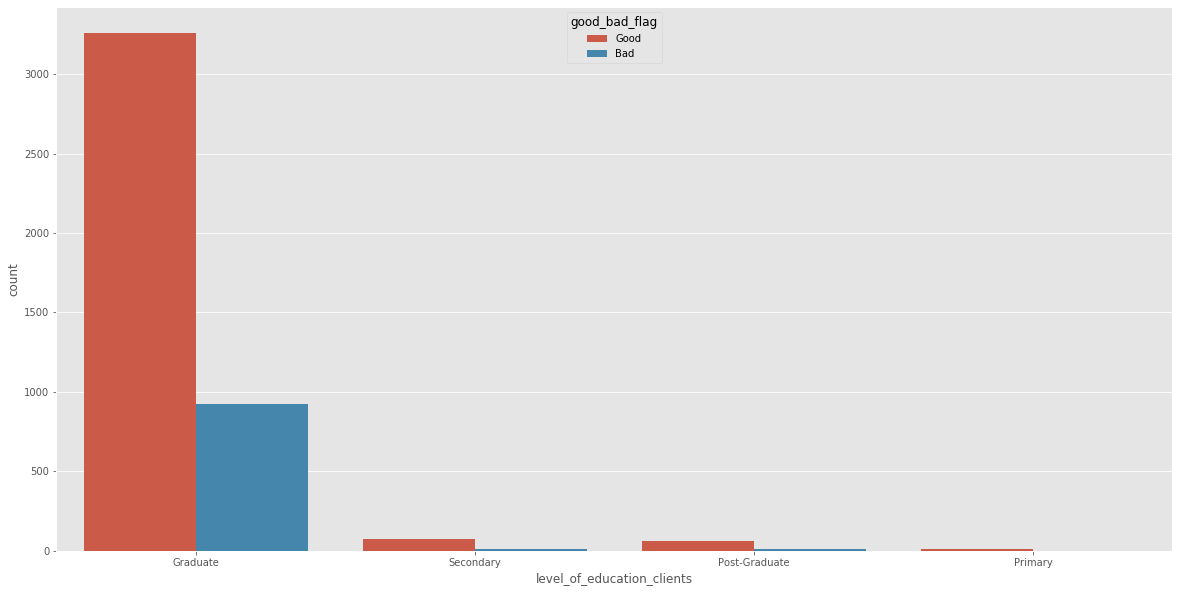

In [229]:
sns.countplot(x = "level_of_education_clients", hue = "good_bad_flag", data = df)

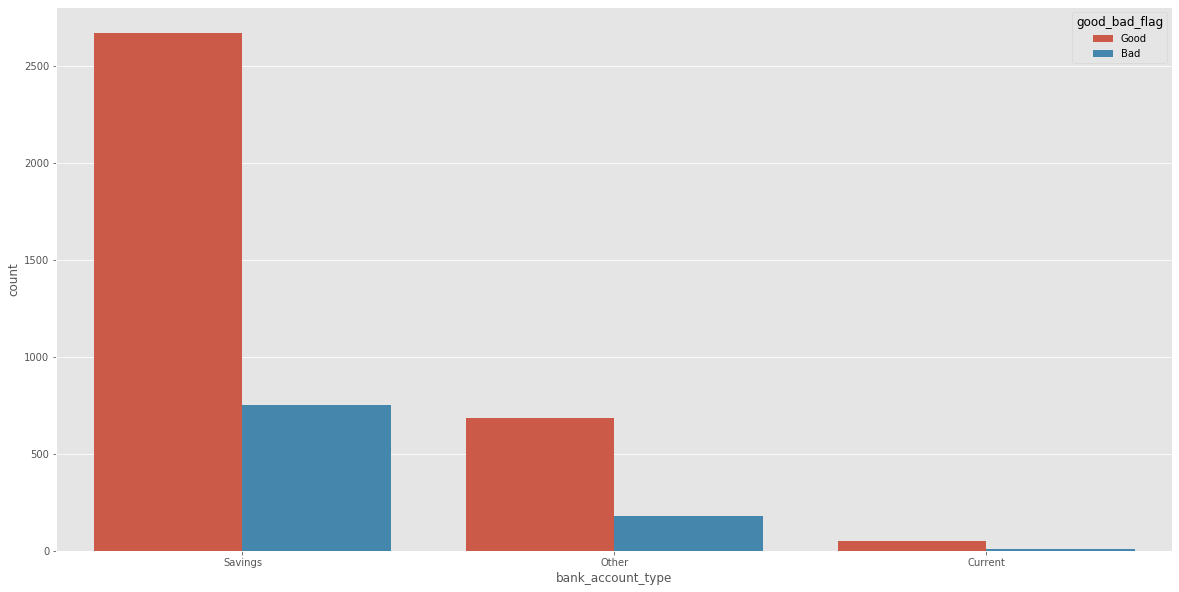

In [230]:
sns.countplot(x = "bank_account_type", hue = "good_bad_flag", data = df)

ENCODING CATEGORICAL VARIABLES

we would be using the pandas category datatype label encoder to convert all categorical data to numbers

In [231]:
for var in cat_var:
    df[var] = df[var].astype('category').cat.codes
    
    print(f"the value count for {var} is:\n", df[var].value_counts(), "\n")
df

#cat_var is a list of previously defined columns of type object

the value count for bank_account_type is:
 2    3425
1     865
0      56
Name: bank_account_type, dtype: int64 

the value count for employment_status_clients is:
 1    3794
3     348
4     142
5      57
2       4
0       1
Name: employment_status_clients, dtype: int64 

the value count for level_of_education_clients is:
 0    4179
3      89
1      68
2      10
Name: level_of_education_clients, dtype: int64 

the value count for good_bad_flag is:
 1    3403
0     943
Name: good_bad_flag, dtype: int64 



,customerid,systemloanid,loannumber,loanamount,totaldue,termdays,good_bad_flag,longitude_gps,latitude_gps,bank_account_type,employment_status_clients,level_of_education_clients,birthdate_ts,approveddate_ts,creationdate_ts,closeddate_ts,firstduedate_ts,firstrepaiddate_ts
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,30000.0,34500.0,30,1,3.319219,6.528604,2,1,0,119059200.0,1.500971e+09,1.500967e+09,1.472746e+09,1.473811e+09,1.472745e+09
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,15000.0,17250.0,30,1,3.325598,7.119403,2,1,0,506649600.0,1.499274e+09,1.499271e+09,1.495983e+09,1.496102e+09,1.495757e+09
2,8a8588f35438fe12015444567666018e,301966580,7,20000.0,22250.0,15,1,5.746100,5.563174,2,1,0,544233600.0,1.499353e+09,1.499349e+09,1.493245e+09,1.491264e+09,1.493244e+09
3,8a85890754145ace015429211b513e16,301999343,3,10000.0,11500.0,15,1,3.362850,6.642485,2,1,0,679881600.0,1.501182e+09,1.501178e+09,1.492998e+09,1.492992e+09,1.492995e+09
4,8a858970548359cc0154883481981866,301962360,9,40000.0,44000.0,30,1,8.455332,11.971410,2,1,0,406771200.0,1.499125e+09,1.499122e+09,1.500067e+09,1.499040e+09,1.500067e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4341,8a858f6c570f2d6601572a4acffc221f,302000403,7,20000.0,24500.0,30,1,3.236753,7.030168,1,1,0,503280000.0,1.501243e+09,1.501240e+09,1.491164e+09,1.491264e+09,1.491163e+09
4342,8a858f735aec46c4015af026256357b8,301999973,5,20000.0,24500.0,30,1,7.013750,4.875662,2,1,0,394329600.0,1.501229e+09,1.501225e+09,1.499702e+09,1.499645e+09,1.499701e+09
4343,8a858f7c5be8dc45015bea117aa57efe,301979154,3,10000.0,11500.0,15,1,6.295530,7.092508,2,1,0,622771200.0,1.500126e+09,1.500122e+09,1.486027e+09,1.486080e+09,1.486026e+09
4344,8a858f8658c206a90158d0c447863597,301988349,8,30000.0,34500.0,30,1,3.354206,6.539070,2,1,2,494812800.0,1.500586e+09,1.500582e+09,1.499439e+09,1.498090e+09,1.498678e+09
